<a href="https://colab.research.google.com/github/Rithvika398/Android_Blog_Projects/blob/master/encoderdecodertrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import files
uploaded = files.upload()

Saving image_3_modified.txt to image_3_modified.txt


In [40]:
from google.colab import files
nparrays = files.upload()

Saving LP.35.6256.20180823153059.128_crop_model2.npy to LP.35.6256.20180823153059.128_crop_model2 (1).npy
Saving LP.35.6256.20180823153059.128_model1.npy to LP.35.6256.20180823153059.128_model1 (1).npy
Saving LP.35.6256.20180823153059.128_model2.npy to LP.35.6256.20180823153059.128_model2 (1).npy
Saving LP.35.6257.20180823153125.897_crop_model2.npy to LP.35.6257.20180823153125.897_crop_model2 (1).npy
Saving LP.35.6257.20180823153125.897_model1.npy to LP.35.6257.20180823153125.897_model1 (1).npy
Saving LP.35.6257.20180823153125.897_model2.npy to LP.35.6257.20180823153125.897_model2 (1).npy
Saving LP.35.6259.20180823153208.050_crop_model2.npy to LP.35.6259.20180823153208.050_crop_model2 (1).npy
Saving LP.35.6259.20180823153208.050_model1.npy to LP.35.6259.20180823153208.050_model1 (1).npy
Saving LP.35.6259.20180823153208.050_model2.npy to LP.35.6259.20180823153208.050_model2 (1).npy
Saving LP.35.6261.20180823153321.659_crop_model2.npy to LP.35.6261.20180823153321.659_crop_model2 (1).npy


In [41]:
from google.colab import files
charset = files.upload()

Saving charset.txt to charset.txt


In [42]:
with open('image_3_modified.txt', "r") as ins:
    array = []
    for line in ins:
        array.append(line)
print(len(array))        
print(array[0][:29])
print(array[0][34:])

89
LP.35.6256.20180823153059.128
KL44A566



In [43]:
import numpy as np
import os
#Reading path name from text file..reading corresponding numpy arrays of each of the models and appending them together with # signs in between and $ as delimiter to create the input tensors
inputs=np.zeros((len(array),33,43))
y=np.zeros((1,1,43))
x=np.zeros((1,1,43))

#print(len(d))
#print(len(array))

y[0][0][23]=1
x[0][0][40]=1

#print(y.shape)
s=[]
d = [["" for x in range(10)] for y in range(len(array))]
#d=np.zeros((1,10,len(array)))
#d=[[none]*10]*len(array)
for i in range (len(array)):
    #data_folder = os.path.join("scores_data", "Image_3")
    data_folder=""

    tmp_file = os.path.join(data_folder, array[i][:29])
    a_file_to_open=tmp_file + "_crop_model2.npy"
    b_file_to_open=tmp_file + "_model1.npy"
    c_file_to_open=tmp_file + "_model2.npy"
    d[i]=array[i][34:]
    

    a=np.load(a_file_to_open)
    b=np.load(b_file_to_open)
    c=np.load(c_file_to_open)
    print(a[0][8][:])
    
    #print(a.shape)
    #print(b.shape)
    #print(c.shape)
    #print(y.shape)
    
    
    a=np.append(a,y,axis=1)
    a=np.append(a,b,axis=1)
    a=np.append(a,y,axis=1)
    a=np.append(a,c,axis=1)
    a=np.append(a,x,axis=1)
    
    inputs[i]=a




    #print(a)
    print(d)
    #print(len(d))
    #print(d[0][1])
print(a.shape)

print(inputs[0])
sequence_lengths = [len(seq) for seq in inputs]

[0.00226622 0.00198486 0.00265933 0.00226933 0.00208349 0.00238327
 0.00239652 0.00233649 0.0022532  0.00233682 0.00410705 0.00321093
 0.0026709  0.00312658 0.00300936 0.00253009 0.00225884 0.0022677
 0.00348904 0.00182217 0.00243834 0.00226277 0.00261889 0.00226399
 0.00222167 0.00278007 0.00287273 0.00243965 0.00329725 0.00226853
 0.00206427 0.00165597 0.00192713 0.00304035 0.0022567  0.0024256
 0.00239909 0.0026243  0.00213653 0.00291538 0.00225731 0.0022662
 0.89510506]
['KL44A566\n', ['', '', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '', '', ''], ['

In [44]:
#creating output tensors by creating one hot encoded matrices
one_hot_encoded_outputs=np.zeros((len(d),10,43))

#file_to_open = os.path.join("annotations", "charset.txt")
#f = open(file_to_open)
#print(f.read())

#print(d)

with open("charset.txt", "r") as ins:
    chararray = []
    for line in ins:
        chararray.append(line)
print(chararray[2][2])


print(d[1][1])
#print(one_hot_encoded_outputs)
print(len(chararray))
print(len(d))
for k in range (len(d)):
    flag1=0
    flag2=0
    flag3=0
    
    if(len(d[k])==8):
                one_hot_encoded_outputs[k][9][42]= 1
                one_hot_encoded_outputs[k][8][42]= 1
                one_hot_encoded_outputs[k][7][42]= 1

                flag1=1
    elif(len(d[k])==9):
                one_hot_encoded_outputs[k][9][42:]= 1
                one_hot_encoded_outputs[k][8][42]= 1

                flag2=1
    elif(len(d[k])==10):
                one_hot_encoded_outputs[k][9][42]= 1
                flag3=1
    count=0

    
    for i in range (10):

        print(len(d[k]))
        
        count=count+1
        
        if(flag1==1 and count>=8):
                break
                
        if(flag2==1 and count>=9):
                break
                
        if(flag3==1 and count>=10):
                break

        for j in range (len(chararray)):
    #print(d[i])
            

                
            
            
            if(d[k][i]==chararray[j][2]):
                print(chararray[j])
                print(chararray[j][0])
                one_hot_encoded_outputs[k][i][int(chararray[j][0])]=1
                break
    
            elif (d[k][i] == chararray[j][3] ):
                print(chararray[j])
                print(chararray[j][0:2])
                one_hot_encoded_outputs[k][i][int(chararray[j][0:2])]=1
                break
                
        
            
            

        
print(len(d[0]))
print(d[0][7])
print(one_hot_encoded_outputs[0])      

A
A
43
89
9
4	K

4
9
20	L

20
9
28	4

28
9
28	4

28
9
1	A

1
9
15	5

15
9
10	6

10
9
10	6

10
9
10
4	K

4
10
1	A

1
10
15	5

15
10
11	1

11
10
1	A

1
10
10	6

10
10
18	8

18
10
14	3

14
10
10	6

10
10
10
4	K

4
10
1	A

1
10
11	1

11
10
10	6

10
10
24	C

24
10
2	9

2
10
33	0

33
10
10	6

10
10
2	9

2
10
9
4	K

4
9
1	A

1
9
14	3

14
9
26	2

26
9
11	1

11
9
11	1

11
9
15	5

15
9
15	5

15
9
10
17	T

17
10
30	N

30
10
13	7

13
10
33	0

33
10
39	J

39
10
14	3

14
10
18	8

18
10
33	0

33
10
13	7

13
10
11
17	T

17
11
30	N

30
11
26	2

26
11
6	G

6
11
1	A

1
11
22	H

22
11
2	9

2
11
11	1

11
11
18	8

18
11
14	3

14
11
4	K

4
11
1	A

1
11
33	0

33
11
11	1

11
11
1	A

1
11
22	H

22
11
14	3

14
11
11	1

11
11
15	5

15
11
2	9

2
11
17	T

17
11
30	N

30
11
26	2

26
11
18	8

18
11
1	A

1
11
21	F

21
11
13	7

13
11
13	7

13
11
13	7

13
11
13	7

13
11
17	T

17
11
30	N

30
11
14	3

14
11
33	0

33
11
1	A

1
11
36	X

36
11
18	8

18
11
26	2

26
11
18	8

18
11
15	5

15
11
4	K

4
11
1	A

1
11
15	5

15
11
14

In [45]:
import numpy as np #matrix math 
import tensorflow as tf #machine learningt
#import helpers #for formatting data into batches and generating random sequence data

tf.reset_default_graph() #Clears the default graph stack and resets the global default graph.
sess = tf.InteractiveSession() #initializes a tensorflow session

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:

import numpy as np

def batchfunc(inputs, max_sequence_length=None):
    """
    Args:
        inputs:
            list of sentences (integer lists)
        max_sequence_length:
            integer specifying how large should `max_time` dimension be.
            If None, maximum sequence length would be used
    
    Outputs:
        inputs_time_major:
            input sentences transformed into time-major matrix 
            (shape [max_time, batch_size]) padded with 0s
        sequence_lengths:
            batch-sized list of integers specifying amount of active 
            time steps in each input sequence
    """
    
    sequence_lengths = [len(seq) for seq in inputs]
    batch_size = len(inputs)
    
    if max_sequence_length is None:
        max_sequence_length = max(sequence_lengths)
    
    inputs_batch_major = np.zeros(shape=[batch_size, max_sequence_length], dtype=np.int32) # == PAD
    
    for i, seq in enumerate(inputs):
        for j, element in enumerate(seq):
            inputs_batch_major[i, j] = element

    # [batch_size, max_time] -> [max_time, batch_size]
    inputs_time_major = inputs_batch_major.swapaxes(0, 1)

    return inputs_time_major, sequence_lengths


def random_sequences(length_from, length_to,
                     vocab_lower, vocab_upper,
                     batch_size):
    """ Generates batches of random integer sequences,
        sequence length in [length_from, length_to],
        vocabulary in [vocab_lower, vocab_upper]
    """
    if length_from > length_to:
            raise ValueError('length_from > length_to')

    def random_length():
        if length_from == length_to:
            return length_from
        return np.random.randint(length_from, length_to + 1)
    
    while True:
        yield [
            np.random.randint(low=vocab_lower,
                              high=vocab_upper,
                              size=random_length()).tolist()
            for _ in range(batch_size)
        ]


In [47]:
tf.__version__

'1.12.0'

In [0]:
#First critical thing to decide: vocabulary size.
#Dynamic RNN models can be adapted to different batch sizes 
#and sequence lengths without retraining 
#(e.g. by serializing model parameters and Graph definitions via tf.train.Saver), 
#but changing vocabulary size requires retraining the model.

PAD = 0
EOS = 1

vocab_size = 43
input_embedding_size = 33 #character length

encoder_hidden_units = 20 #num neurons
decoder_hidden_units = encoder_hidden_units * 2 #in original paper, they used same number of neurons for both encoder
#and decoder, but we use twice as many so decoded output is different, the target value is the original input 
#in this example
batch_size=10

In [0]:
#input placehodlers
encoder_inputs = tf.placeholder(shape=(None,None), dtype=tf.int32, name='encoder_inputs')
#contains the lengths for each of the sequence in the batch, we will pad so all the same
#if you don't want to pad, check out dynamic memory networks to input variable length sequences
encoder_inputs_length = tf.placeholder(shape=(None,), dtype=tf.int32, name='encoder_inputs_length')
decoder_targets = tf.placeholder(shape=(None,None), dtype=tf.int32, name='decoder_targets')



In [0]:
embeddings = tf.Variable(tf.random_uniform([vocab_size, input_embedding_size ], -1.0, 1.0), dtype=tf.float32)

#this thing could get huge in a real world application
encoder_inputs_embedded = tf.nn.embedding_lookup(embeddings, encoder_inputs)

In [0]:
from tensorflow.python.ops.rnn_cell import LSTMCell, LSTMStateTuple


In [0]:
encoder_cell = LSTMCell(encoder_hidden_units)


In [0]:
((encoder_fw_outputs,
  encoder_bw_outputs),
 (encoder_fw_final_state,
  encoder_bw_final_state)) = (
    tf.nn.bidirectional_dynamic_rnn(cell_fw=encoder_cell,
                                    cell_bw=encoder_cell,
                                    inputs=encoder_inputs_embedded,
                                    sequence_length=None,
                                    dtype=tf.float32, time_major=True)
)

In [54]:
encoder_fw_outputs


<tf.Tensor 'bidirectional_rnn/fw/fw/TensorArrayStack/TensorArrayGatherV3:0' shape=(?, ?, 20) dtype=float32>

In [55]:
encoder_bw_outputs


<tf.Tensor 'ReverseV2:0' shape=(?, ?, 20) dtype=float32>

In [56]:
encoder_fw_final_state


LSTMStateTuple(c=<tf.Tensor 'bidirectional_rnn/fw/fw/while/Exit_3:0' shape=(?, 20) dtype=float32>, h=<tf.Tensor 'bidirectional_rnn/fw/fw/while/Exit_4:0' shape=(?, 20) dtype=float32>)

In [57]:
encoder_bw_final_state


LSTMStateTuple(c=<tf.Tensor 'bidirectional_rnn/bw/bw/while/Exit_3:0' shape=(?, 20) dtype=float32>, h=<tf.Tensor 'bidirectional_rnn/bw/bw/while/Exit_4:0' shape=(?, 20) dtype=float32>)

In [0]:
#Concatenates tensors along one dimension.
encoder_outputs = tf.concat((encoder_fw_outputs, encoder_bw_outputs), 2)

#letters h and c are commonly used to denote "output value" and "cell state". 
#http://colah.github.io/posts/2015-08-Understanding-LSTMs/ 
#Those tensors represent combined internal state of the cell, and should be passed together. 

encoder_final_state_c = tf.concat(
    (encoder_fw_final_state.c, encoder_bw_final_state.c), 1)

encoder_final_state_h = tf.concat(
    (encoder_fw_final_state.h, encoder_bw_final_state.h), 1)

#TF Tuple used by LSTM Cells for state_size, zero_state, and output state.
encoder_final_state = LSTMStateTuple(
    c=encoder_final_state_c,
    h=encoder_final_state_h
)

In [0]:
decoder_cell = LSTMCell(decoder_hidden_units)


In [0]:
encoder_max_time, batch_size = tf.unstack(tf.shape(encoder_inputs))


In [0]:
dec= [len(seq) for seq in one_hot_encoded_outputs ]
decoder_lengths = 10

In [0]:
#manually specifying since we are going to implement attention details for the decoder in a sec
#weights
W = tf.Variable(tf.random_uniform([decoder_hidden_units, vocab_size], -1, 1), dtype=tf.float32)
#bias
b = tf.Variable(tf.zeros([vocab_size]), dtype=tf.float32)

In [0]:
#create padded inputs for the decoder from the word embeddings

#were telling the program to test a condition, and trigger an error if the condition is false.
assert EOS == 1 and PAD == 0

eos_time_slice = tf.ones([batch_size], dtype=tf.int32, name='EOS')
pad_time_slice = tf.zeros([batch_size], dtype=tf.int32, name='PAD')

#retrieves rows of the params tensor. The behavior is similar to using indexing with arrays in numpy
eos_step_embedded = tf.nn.embedding_lookup(embeddings, eos_time_slice)
pad_step_embedded = tf.nn.embedding_lookup(embeddings, pad_time_slice)

In [0]:
#manually specifying loop function through time - to get initial cell state and input to RNN
#normally we'd just use dynamic_rnn, but lets get detailed here with raw_rnn

#we define and return these values, no operations occur here
def loop_fn_initial():
    initial_elements_finished = (0 >= decoder_lengths)  # all False at the initial step
    #end of sentence
    initial_input = eos_step_embedded
    #last time steps cell state
    initial_cell_state = encoder_final_state
    #none
    initial_cell_output = None
    #none
    initial_loop_state = None  # we don't need to pass any additional information
    return (initial_elements_finished,
            initial_input,
            initial_cell_state,
            initial_cell_output,
            initial_loop_state)

In [0]:
#attention mechanism --choose which previously generated token to pass as input in the next timestep
def loop_fn_transition(time, previous_output, previous_state, previous_loop_state):

    
    def get_next_input():
        #dot product between previous ouput and weights, then + biases
        output_logits = tf.add(tf.matmul(previous_output, W), b)
        #Logits simply means that the function operates on the unscaled output of 
        #earlier layers and that the relative scale to understand the units is linear. 
        #It means, in particular, the sum of the inputs may not equal 1, that the values are not probabilities 
        #(you might have an input of 5).
        #prediction value at current time step
        
        #Returns the index with the largest value across axes of a tensor.
        prediction = tf.argmax(output_logits, axis=1)
        #embed prediction for the next input
        next_input = tf.nn.embedding_lookup(embeddings, prediction)
        return next_input
    
    
    elements_finished = (time >= decoder_lengths) # this operation produces boolean tensor of [batch_size]
                                                  # defining if corresponding sequence has ended

    
    
    #Computes the "logical and" of elements across dimensions of a tensor.
    finished = tf.reduce_all(elements_finished) # -> boolean scalar
    #Return either fn1() or fn2() based on the boolean predicate pred.
    input = tf.cond(finished, lambda: pad_step_embedded, get_next_input)
    
    #set previous to current
    state = previous_state
    output = previous_output
    loop_state = None

    return (elements_finished, 
            input,
            state,
            output,
            loop_state)

In [0]:
def loop_fn(time, previous_output, previous_state, previous_loop_state):
    if previous_state is None:    # time == 0
        assert previous_output is None and previous_state is None
        return loop_fn_initial()
    else:
        return loop_fn_transition(time, previous_output, previous_state, previous_loop_state)

#Creates an RNN specified by RNNCell cell and loop function loop_fn.
#This function is a more primitive version of dynamic_rnn that provides more direct access to the 
#inputs each iteration. It also provides more control over when to start and finish reading the sequence, 
#and what to emit for the output.
#ta = tensor array
decoder_outputs_ta, decoder_final_state, _ = tf.nn.raw_rnn(decoder_cell, loop_fn)
decoder_outputs = decoder_outputs_ta.stack()

In [67]:
decoder_outputs


<tf.Tensor 'TensorArrayStack/TensorArrayGatherV3:0' shape=(?, ?, 40) dtype=float32>

In [0]:
#to convert output to human readable prediction
#we will reshape output tensor

#Unpacks the given dimension of a rank-R tensor into rank-(R-1) tensors.
#reduces dimensionality
decoder_max_steps, decoder_batch_size, decoder_dim = tf.unstack(tf.shape(decoder_outputs))
#flettened output tensor
decoder_outputs_flat = tf.reshape(decoder_outputs, (-1, decoder_dim))
#pass flattened tensor through decoder
decoder_logits_flat = tf.add(tf.matmul(decoder_outputs_flat, W), b)
#prediction vals
decoder_logits = tf.reshape(decoder_logits_flat, (decoder_max_steps, decoder_batch_size, vocab_size))

In [0]:
decoder_prediction = tf.argmax(decoder_logits, 2)


In [70]:

#cross entropy loss
#one hot encode the target values so we don't rank just differentiate
stepwise_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(
    labels=tf.one_hot(decoder_targets, depth=vocab_size, dtype=tf.float32),
    logits=decoder_logits,
)

#loss function
loss = tf.reduce_mean(stepwise_cross_entropy)
#train it 
train_op = tf.train.AdamOptimizer().minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
sess.run(tf.global_variables_initializer())


In [72]:
batch_size = 100

batches = random_sequences(length_from=3, length_to=8,
                                   vocab_lower=2, vocab_upper=10,
                                   batch_size=batch_size)

print('head of the batch:')
for seq in next(batches)[:10]:
    print(seq)

head of the batch:
[8, 6, 5, 5, 4, 6, 7, 2]
[9, 7, 9, 2, 9, 6, 9]
[8, 5, 6, 7, 6, 8]
[3, 5, 4]
[7, 6, 4, 3, 2, 4, 8]
[2, 5, 6, 3, 7, 9, 5, 2]
[8, 9, 2, 2]
[6, 6, 6]
[3, 5, 6, 5]
[9, 6, 8, 3, 7, 9, 8]


In [0]:
def next_feed():
    batch = next(batches)
    encoder_inputs_, encoder_input_lengths_ = batchfunc(batch)
    decoder_targets_, _ = batchfunc(
        [(sequence) + [EOS] + [PAD] * 2 for sequence in batch]
    )
    return {
        encoder_inputs: encoder_inputs_,
        encoder_inputs_length: encoder_input_lengths_,
        decoder_targets: decoder_targets_,
    }

In [74]:
def data(count):
  encoder_inputs_= inputs[count]
  #encoder_input_lengths_=sequence_lengths[count]
  #encoder_input_lengths_= None
  #tf.reshape(encoder_input_lengths_, [encoder_input_lengths_])
  decoder_targets_  = one_hot_encoded_outputs[count]
  dec= [len(seq) for seq in one_hot_encoded_outputs ]
  decoder_lengths = [(10,43)]


  return {
        encoder_inputs: encoder_inputs_,
        #encoder_inputs_length: encoder_input_lengths_,
        decoder_targets: decoder_targets_,
    }

print(one_hot_encoded_outputs[0].shape)

(10, 43)


In [0]:
loss_track = []
count=0


In [76]:
max_batches = 89
batches_in_epoch = 10

try:
    for batch in range(max_batches):
        fd = data(count)
        count=count+1
        _, l = sess.run([train_op, loss], fd)
        loss_track.append(l)

        if batch == 0 or batch % batches_in_epoch == 0:
            print('batch {}'.format(batch))
            print('  minibatch loss: {}'.format(sess.run(loss, fd)))
            predict_ = sess.run(decoder_prediction, fd)
            for i, (inp, pred,op) in enumerate(zip(fd[encoder_inputs].T, predict_.T, fd[decoder_targets].T)):
                print('  sample {}:'.format(i + 1))
                print('    input     > {}', inp)
                print('   ground truth    > {}'.format(op))
                print('    predicted > {}'.format(pred))
                if i >= 2:
                    break
            print()

except KeyboardInterrupt:
    print('training interrupted')

batch 0
  minibatch loss: 3.2733139991760254
  sample 1:
    input     > {} [0.00261506 0.00303206 0.00292295 0.0022464  0.00252125 0.00174334
 0.00176913 0.00190546 0.00226622 0.00209038 0.         0.00397414
 0.00565092 0.00150371 0.00176845 0.00243444 0.00234449 0.00196345
 0.00174583 0.00222544 0.00223235 0.         0.00299906 0.0036849
 0.00234472 0.00205366 0.00418798 0.00255389 0.00249735 0.00267692
 0.00249523 0.00222693 0.        ]
   ground truth    > [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    predicted > [ 3  5  5  5  5  8  3  0 42 42]
  sample 2:
    input     > {} [0.00118874 0.00326688 0.00248228 0.00249594 0.89664203 0.00171003
 0.00169249 0.00170298 0.00198486 0.0020799  0.         0.0034755
 0.02077378 0.00106169 0.00184197 0.89561188 0.00360831 0.00176645
 0.00179261 0.00182143 0.0018587  0.         0.000954   0.00332159
 0.00314761 0.00222098 0.84643775 0.00262429 0.00258268 0.00288561
 0.00174824 0.00232449 0.        ]
   ground truth    > [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 

loss 0.1236 after 89 examples (batch_size=1)


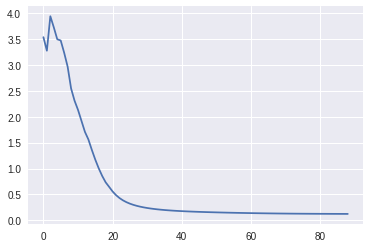

In [78]:
batch_size=1
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_track)
print('loss {:.4f} after {} examples (batch_size={})'.format(loss_track[-1], len(loss_track)*batch_size, batch_size))

In [79]:
for i in range (10):
  print(predict_)
  print(fd[decoder_targets])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0